# Applied Machine Learning Assignment
### Jay Krish Vijendra 222197Y
#### About the Dataset: HousePricePredict Inc. is a tech startup specializing in predictive analytics for real estate.Their primary goal is to develop a robust machine learning model that accurately predicts house prices based on various features.

## Table of Contents

<a id='table_of_contents'></a>

1. [Import libraries](#imports)<br>
2. [Import data](#import_data)<br>
3. [Data exploration](#data_exploration)<br>
4. [Data cleaning and preparation](#data_cleaning)<br>
5. [Model training](#model_training)<br>
6. [Tuning](#tuning)<br>
7. [Validation](#validation)<br>

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from scipy.stats import norm, skew 

In [32]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb
import joblib

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [4]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AML-Assignment/Assignment/house_pricing.csv', keep_default_na=True, na_values=['NA','NA'])
df = pd.read_csv('house_pricing.csv', keep_default_na=True, na_values=['NA','NA'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Data Exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_12860\1820731706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

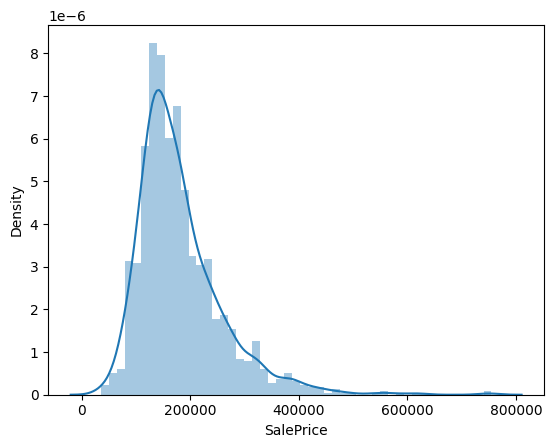

In [8]:
#histogram
sns.distplot(df['SalePrice'])

- Deviation from Normal Distribution: The SalePrice distribution is not symmetrical and does not follow a normal distribution pattern. Instead, it is heavily skewed to the right.
- Positive Skewness: The distribution has a long right tail, showing that there are some houses with very high prices that pull the mean to the right.
- Kurtosis: The distribution is sharply peaked (leptokurtic) around the lower price range, indicating a high concentration of house prices around the mean and significant presence of outliers.

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- Skewness (1.882876): Confirms positive skewness, indicating the presence of a long right tail with many lower-priced houses and a few very high-priced ones.
- Kurtosis (6.536282): Confirms leptokurtic distribution, indicating a sharp peak with high concentration around the mean and heavy tails, meaning there are more extreme values (outliers) than expected in a normal distribution.

C:\Users\User\AppData\Local\Temp\ipykernel_12860\2954598470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=norm)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 mu = 180921.20 and sigma = 79415.29



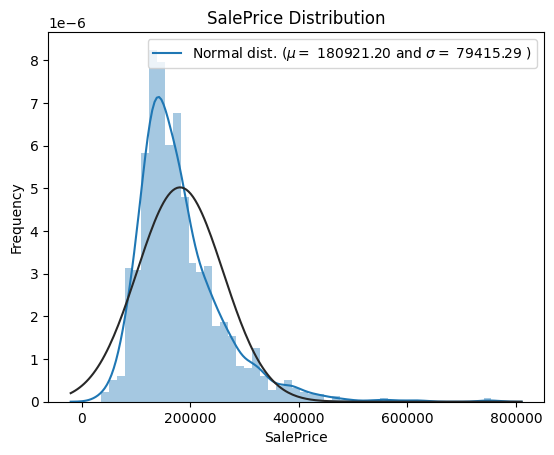

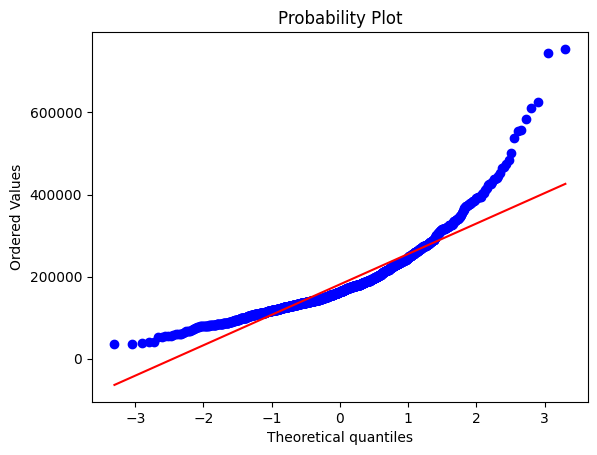

In [10]:
# Plot the original distribution
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



C:\Users\User\AppData\Local\Temp\ipykernel_12860\2432551931.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=norm)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


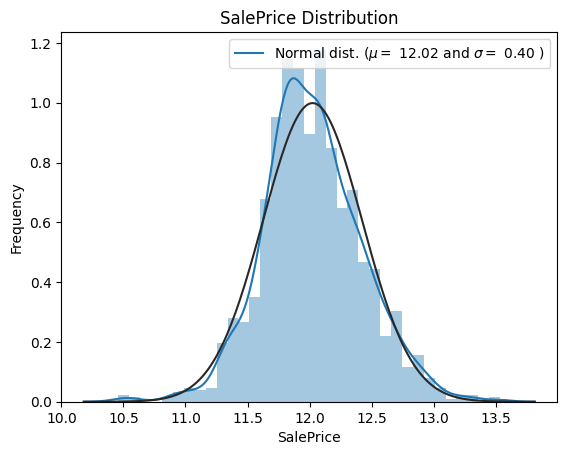

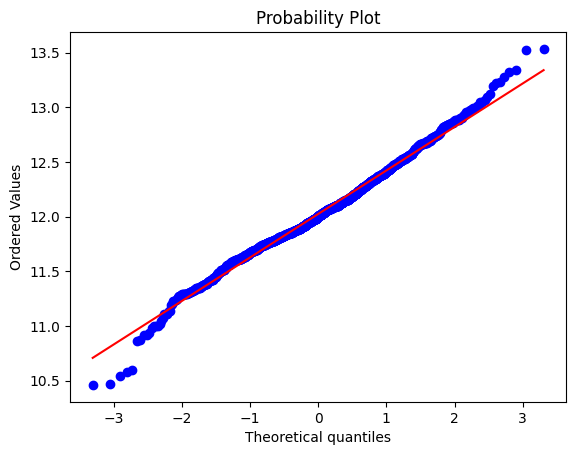

In [11]:
# Apply the log transformation
df["SalePrice"] = np.log1p(df["SalePrice"])

# Plot the new distribution
sns.distplot(df['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

The transformation from mu = '180921.20' and sigma = '79415.29' to mu = '12.02' and sigma = '0.40' indicates a significant improvement in the distribution of the SalePrice data. The log transformation makes the data more suitable for analysis by reducing skewness and the impact of outliers, leading to a more normal-like distribution with a manageable range of values. This results in better model performance and more reliable statistical analysis.

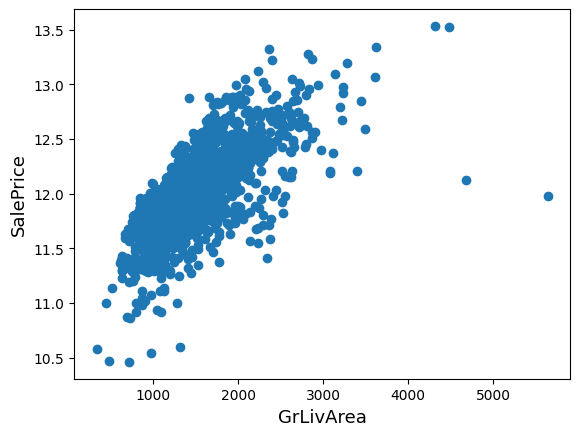

In [12]:
#scatter plot grlivarea/saleprice
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<Axes: >

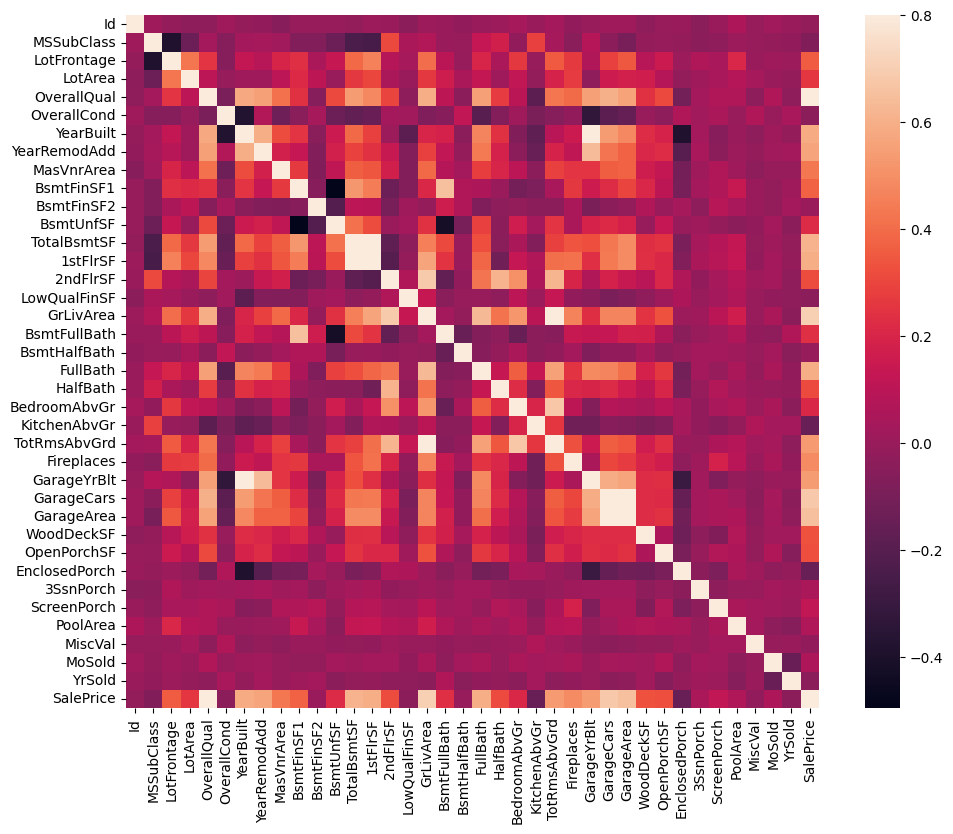

In [13]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corrmat = numeric_df.corr()

# Plot heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<Axes: >

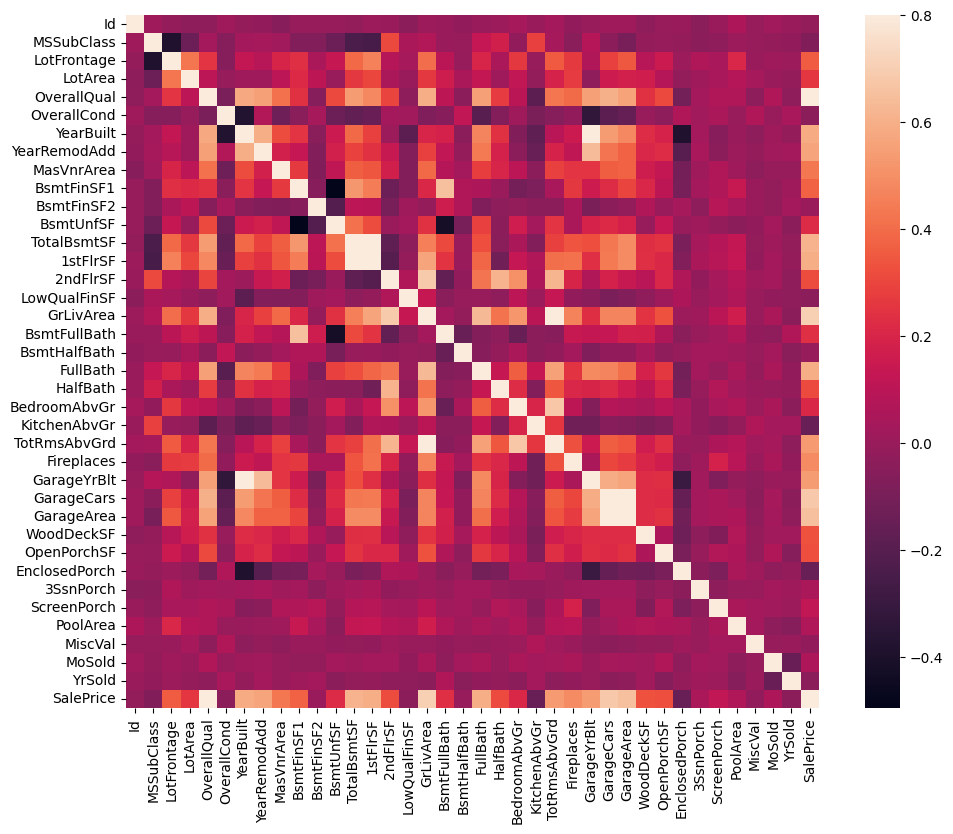

In [14]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corrmat = numeric_df.corr()

# Plot heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# 4. Data Cleaning and Preparation <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [15]:
# Fill missing values

df['Alley'] = df['Alley'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


# Basement-related columns
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'):
    df[col] = df[col].fillna(0)

# Electrical
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# Garage-related columns
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

# PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')

# Fence
df['Fence'] = df['Fence'].fillna('None')

# MiscFeature
df['MiscFeature'] = df['MiscFeature'].fillna('None')

#MSZoning (The general zoning classification)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])


In [16]:
# Check remaining missing values
missing_values = df.isnull().sum().sort_values(ascending=False).head(20)
print(missing_values)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64


In [17]:
# Display the unique values in the 'Utilities' column before cleaning
print("Unique values in 'Utilities' before cleaning:")
print(df['Utilities'].value_counts())

Unique values in 'Utilities' before cleaning:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Removal of Utilities: Since there is only 1 house with 'NoSewa' in the  dataset, this feature won't help in predictive modelling. We can then safely remove it.

In [18]:
# Remove rows with 'NoSeWa' in the 'Utilities' column
df = df[df['Utilities'] != 'NoSeWa']

df.drop(columns=['Utilities'], inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [19]:
# Display the unique values in the 'PoolQC' column before cleaning
print("Unique values in 'PoolQC' before cleaning:")
print(df['PoolQC'].value_counts())

Unique values in 'PoolQC' before cleaning:
PoolQC
None    1452
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64


In [20]:
# Display the unique values in the 'PoolArea' column before cleaning
print("Unique values in 'PoolArea' before cleaning:")
print(df['PoolArea'].value_counts())

Unique values in 'PoolArea' before cleaning:
PoolArea
0      1452
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64


Given that there are only 8 rows of data for properties with pools, I would remove these rows. This small sample size could introduce bias and negatively impact the overall dataset's analysis.

In [21]:
# Exclude rows where 'PoolArea' is 0
df = df[df['PoolArea'] == 0]

# Drop the 'PoolArea' and 'PoolQC' columns
df.drop(columns=['PoolArea', 'PoolQC'], inplace=True)

In [22]:
# Display the first few rows of the modified DataFrame
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,0,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,0,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,0,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,0,None,None,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,...,0,0,MnPrv,None,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,0,4,2010,WD,Normal,11.864469


In [23]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [24]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (1452, 78)


In [25]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [26]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.745570
LotArea,12.487746
3SsnPorch,10.264751
LowQualFinSF,9.242992
LandSlope,4.793904
KitchenAbvGr,4.469701
BsmtFinSF2,4.298274
BsmtHalfBath,4.150757
ScreenPorch,4.089227
EnclosedPorch,2.865891


In [27]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [28]:
df = pd.get_dummies(df)
print(df.shape)

(1452, 219)


In [29]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [30]:
#Validation function
n_folds = 5

def rmsle_cv(model, X_train, y_train, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse

In [31]:
lasso = Lasso(alpha=0.0005, random_state=1)

# Use the rmsle_cv function to evaluate the Lasso model
score = rmsle_cv(lasso, X_train, y_train)
print(f"Lasso score: {score.mean()} ({score.std()})")

Lasso score: 0.015457711800058093 (0.0016111412876019875)


In [33]:
# Save the model
joblib.dump(lasso, 'finetuned_rf_model.pkl')

['finetuned_rf_model.pkl']